# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [5]:
#install spacy in the current conda environment
!pip install spacy
!pip install matplotlib
!pip install numpy spacy scikit-learn matplotlib




In [6]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm
!pip install pandas
!where python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.9 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
/opt/anaconda3/envs/is310/bin/python


In [7]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [8]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [9]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [10]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [11]:
#pandas allows us to quickly apply this cleaning function to› all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [12]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [13]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [14]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [15]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [16]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

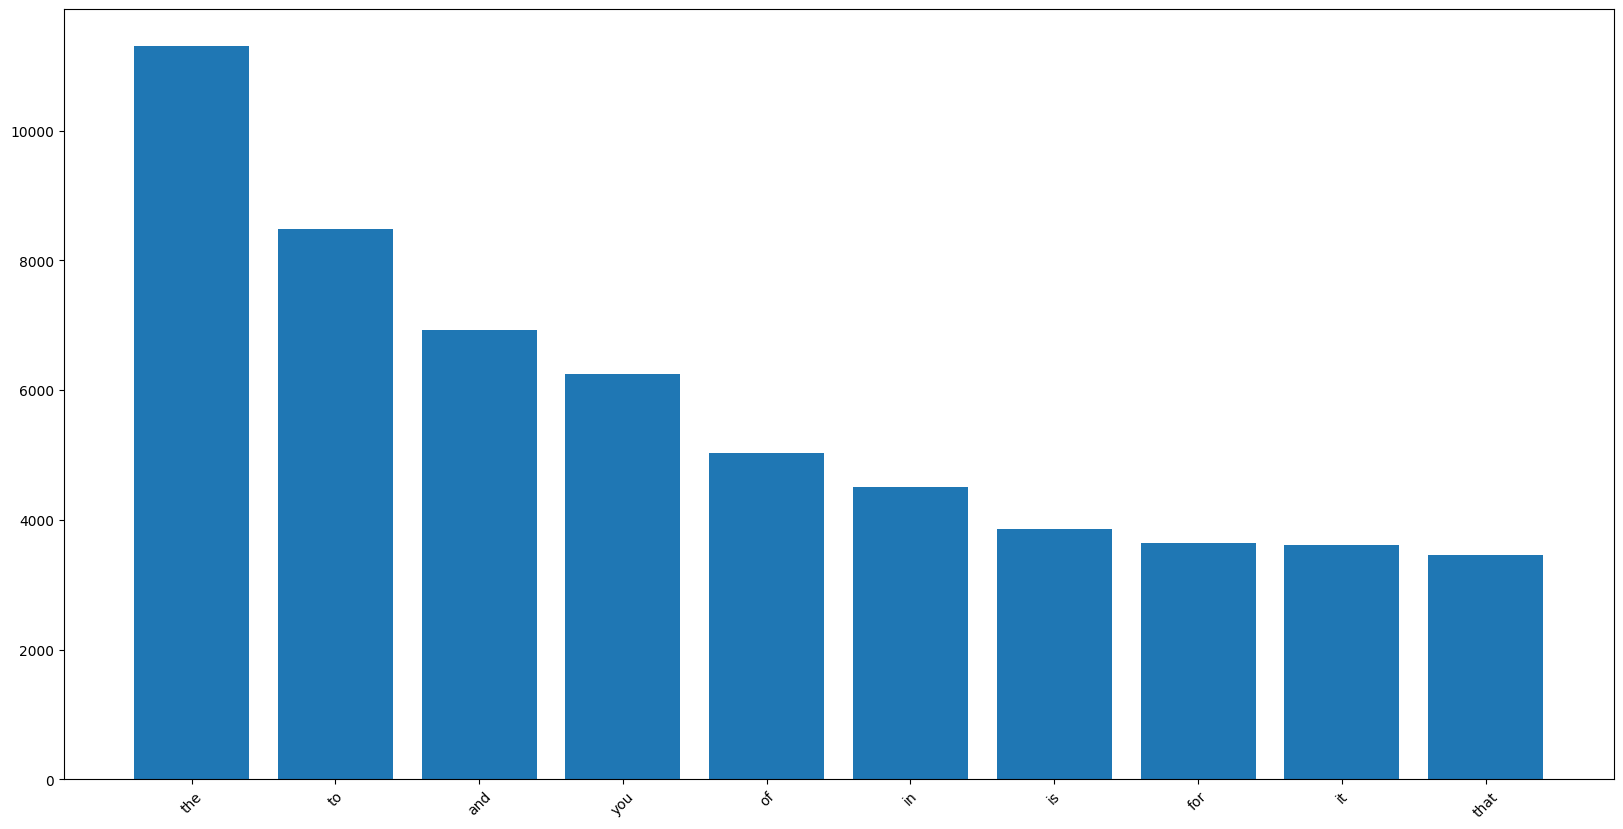

In [18]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: They are all stopwords that doesn't bring any meaningful insights when studying Reddit texts. They are not unique they appear in every type of texts. 

#### Lemmatization and stopword removal

In [19]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [20]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [21]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [22]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [23]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [24]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

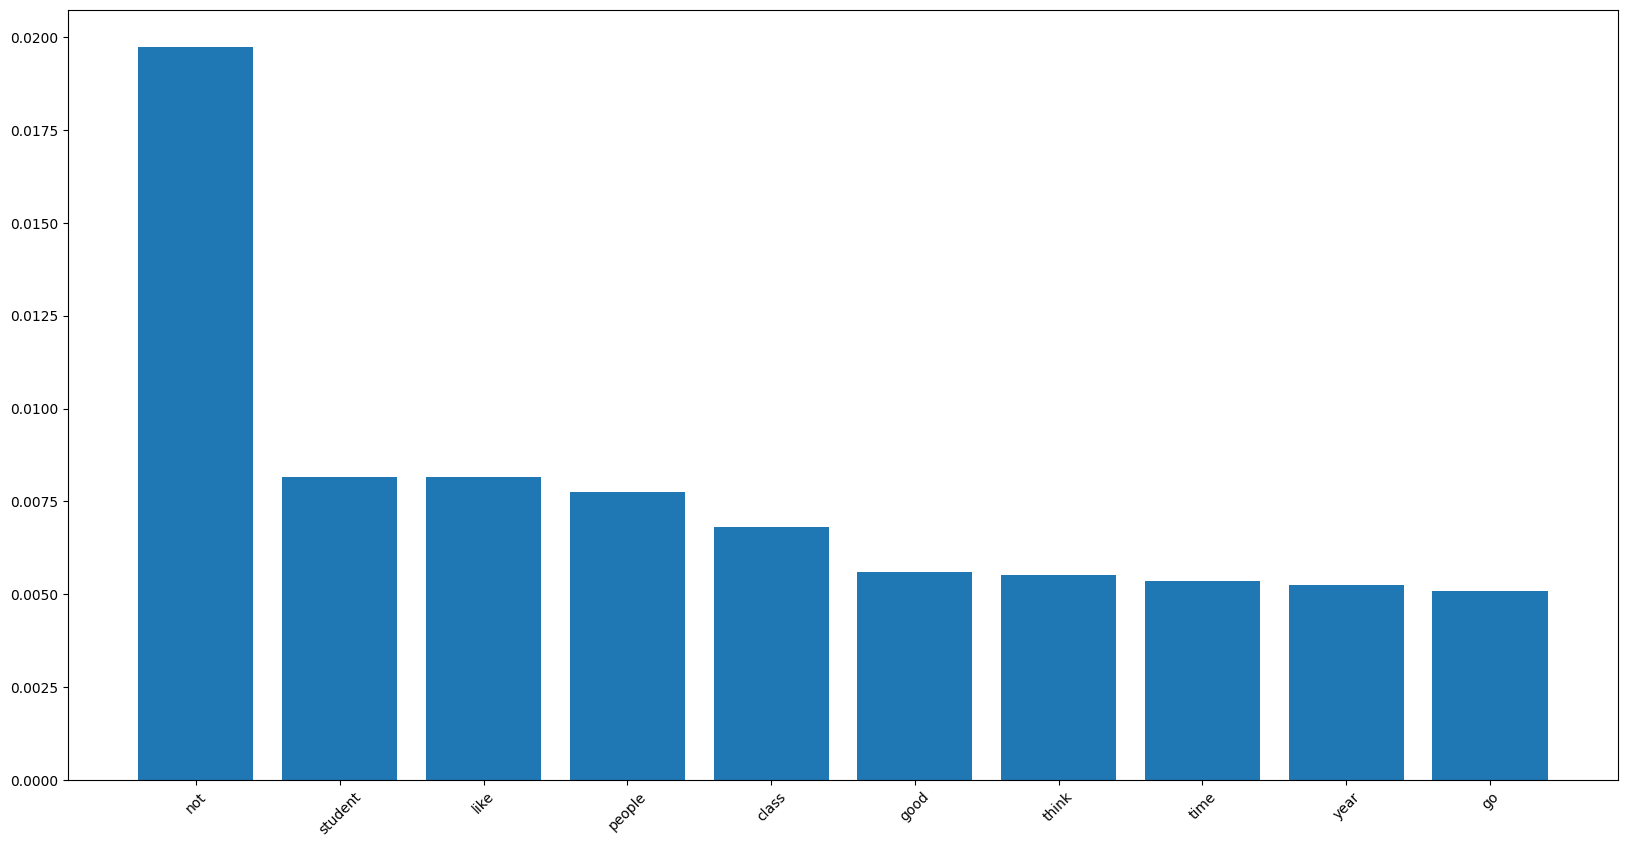

In [25]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [26]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [27]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

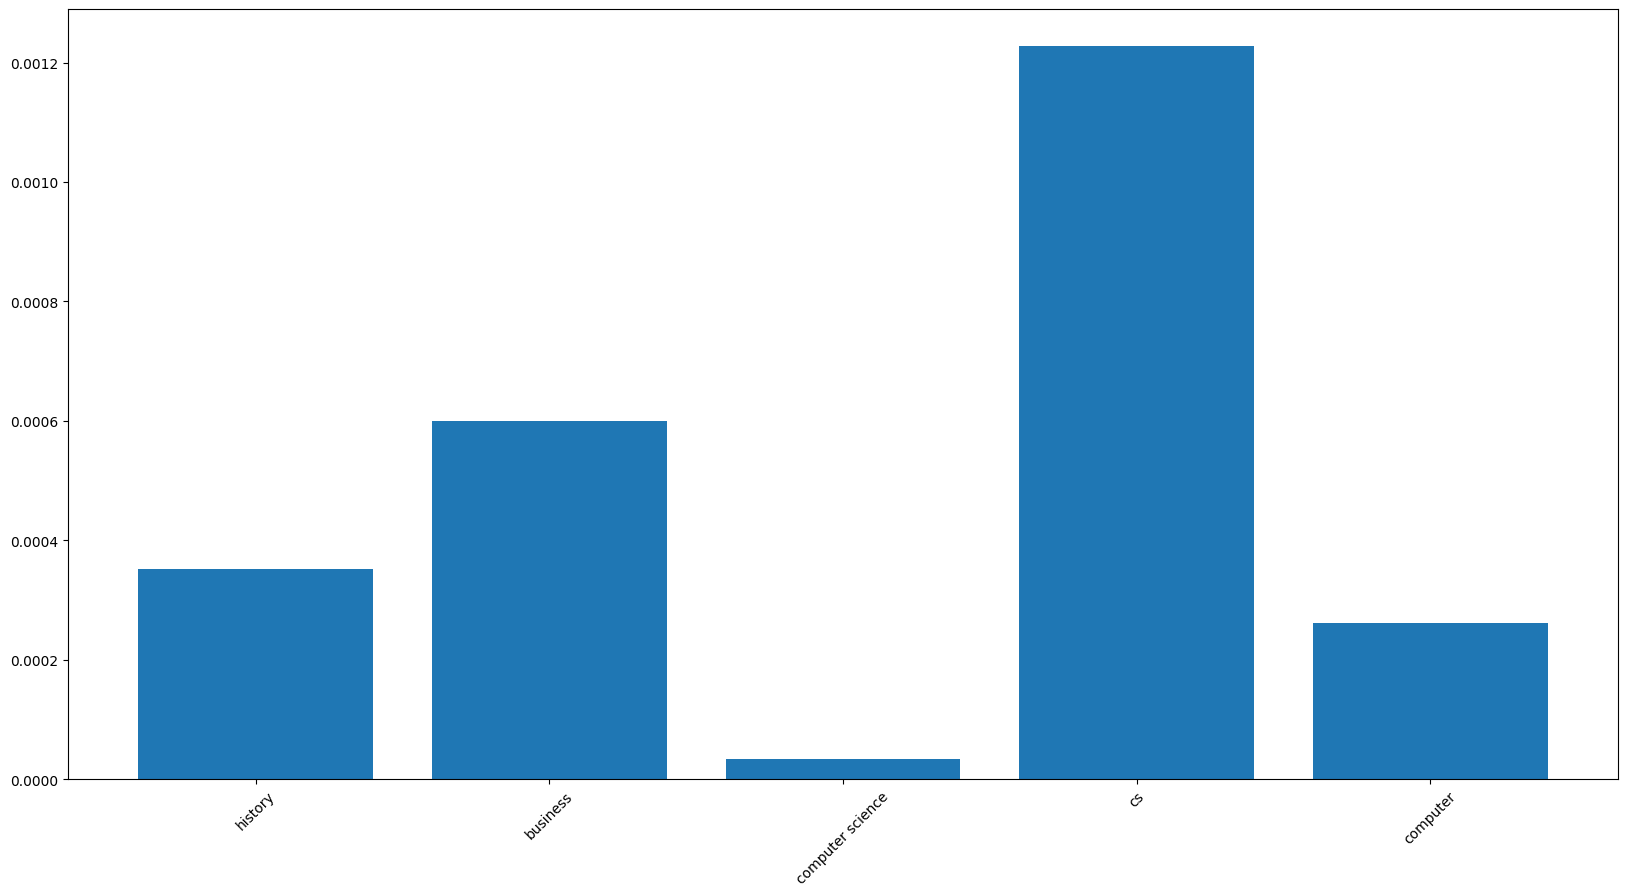

In [28]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [29]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

plot_list=word_counts[["career", "skill", "squirrel", "apartment", "scam"]]
plot_list

career       0.000662
skill        0.000531
squirrel     0.000283
apartment    0.000449
scam         0.000179
dtype: float64

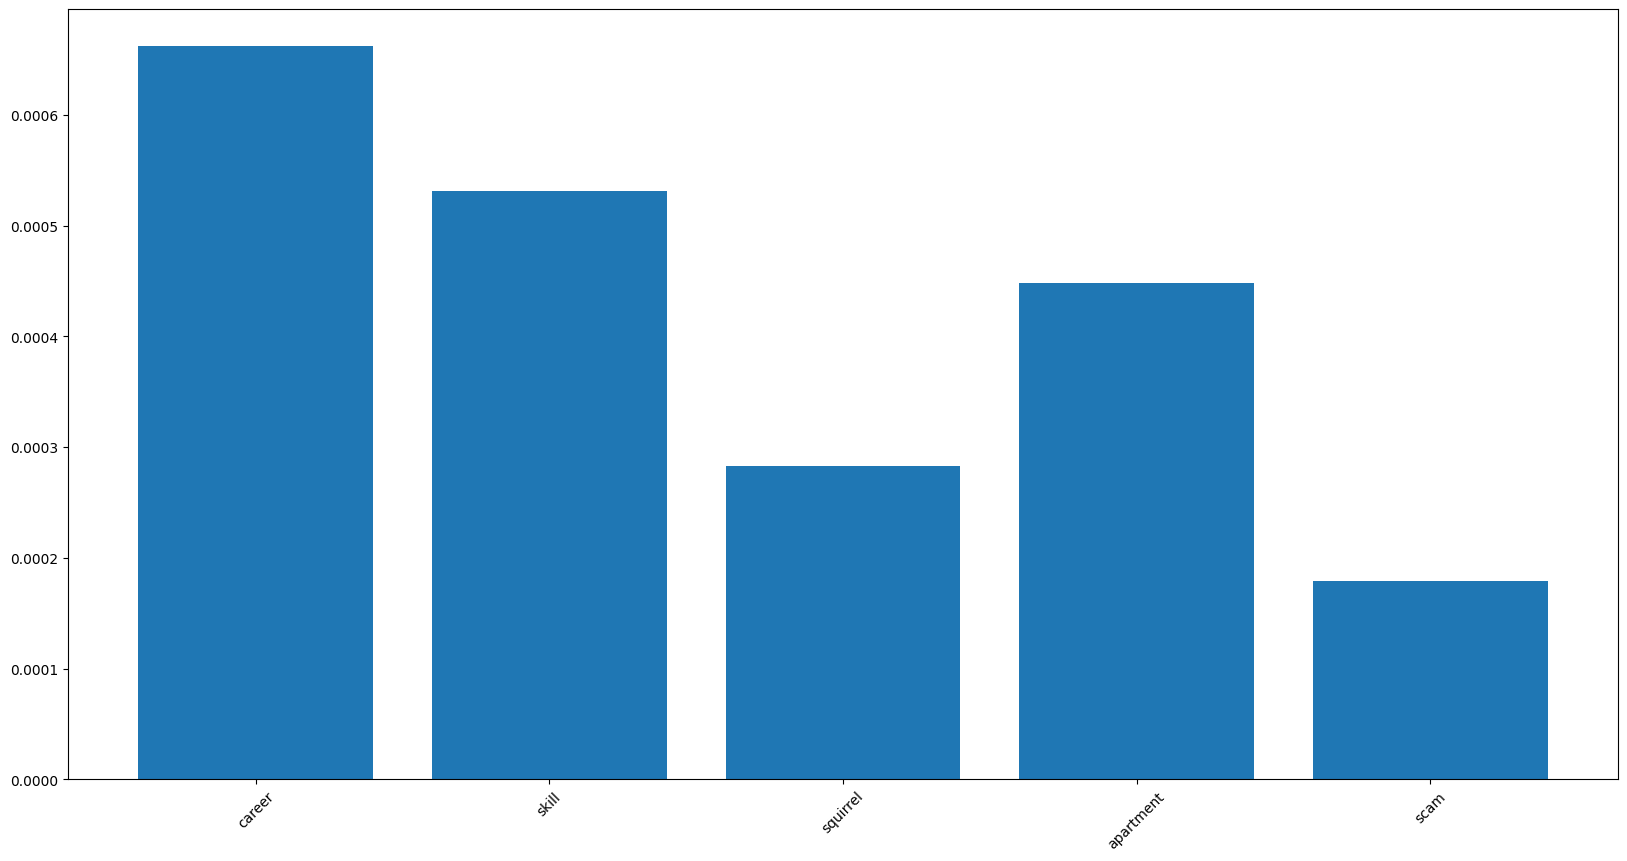

In [30]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

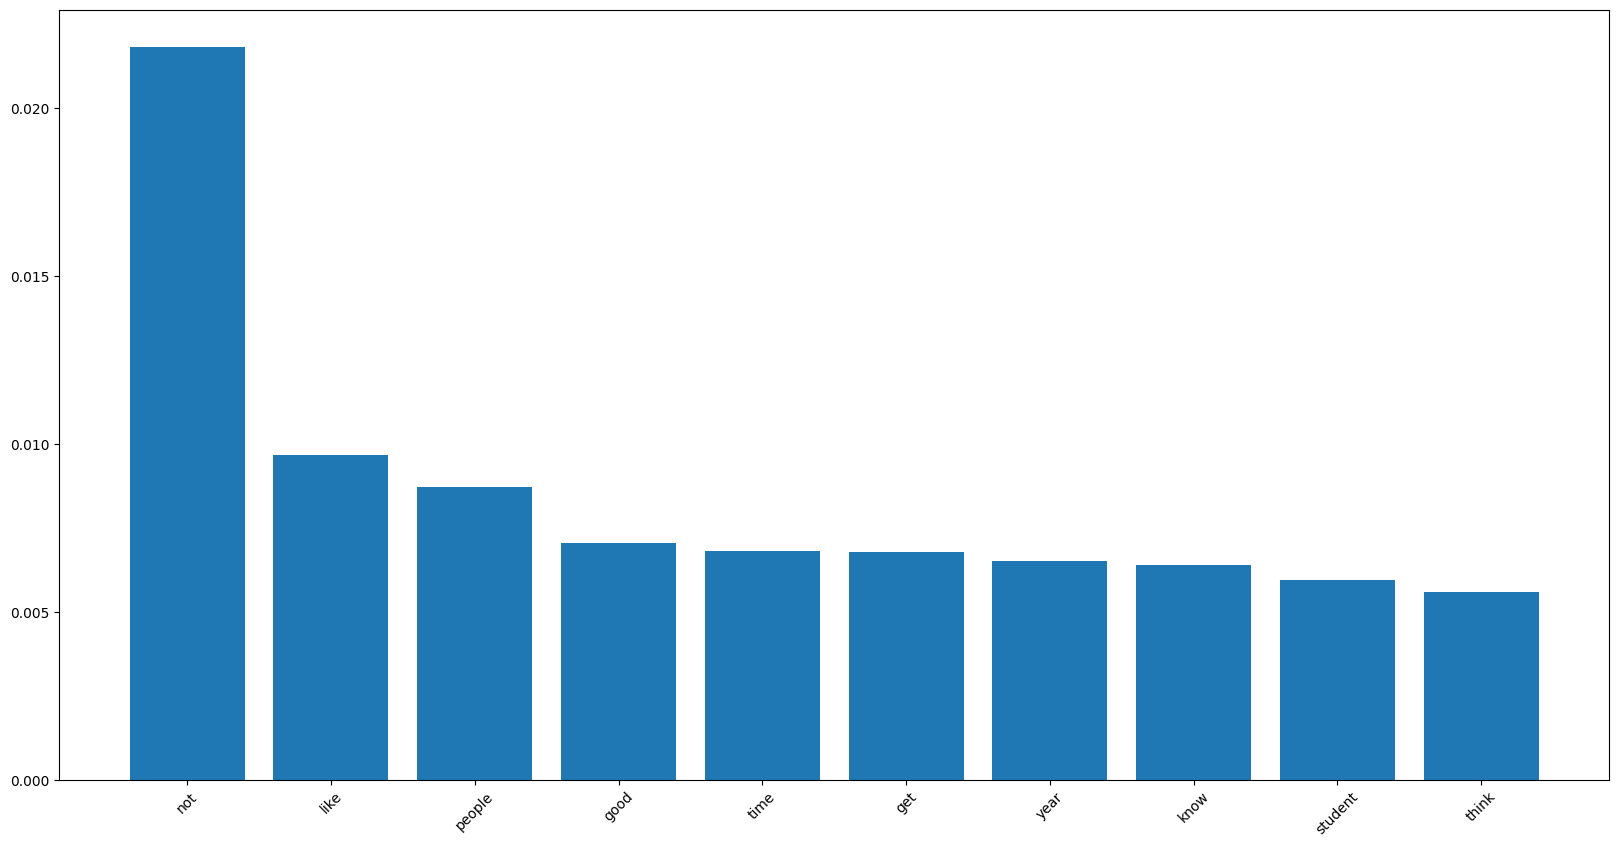

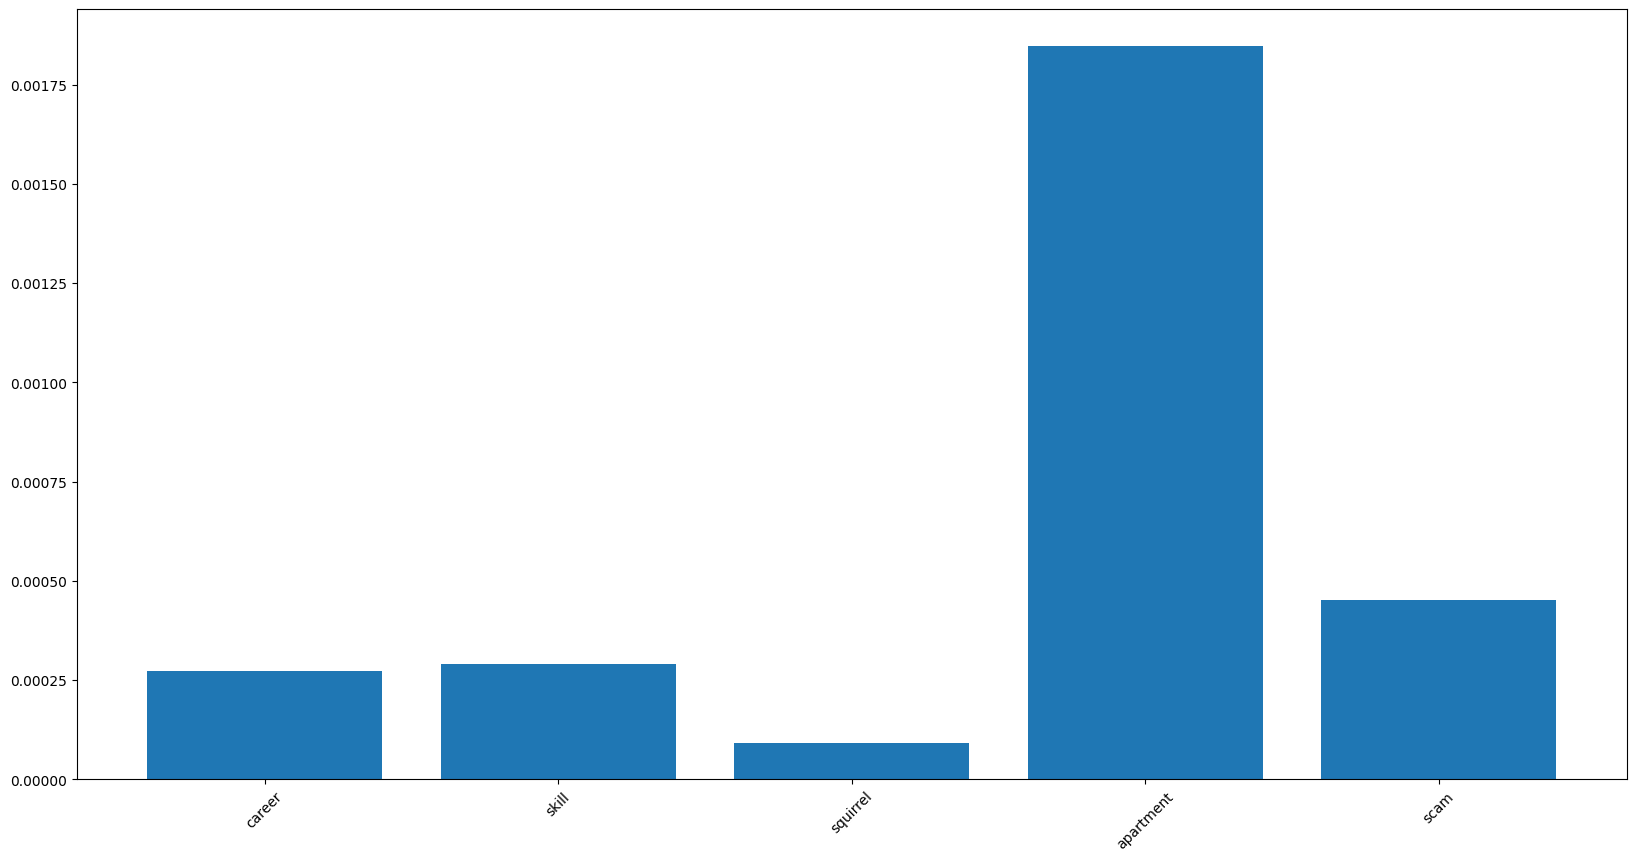

In [31]:
uiuc=pd.read_csv("uiuc.csv")

uiuc=pd.read_csv("uiuc.csv")
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

uiuc['cleaned_text'] = uiuc['text'].apply(clean)
uiuc['cleaned_text'][0]
uiuc['text'][0]

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])

bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)
vectorizer = CountVectorizer(min_df=3, max_df=0.2, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(uiuc['lemmatized_text'])

bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

word_counts = word_counts / word_counts.sum()

plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

plot_list=word_counts[["career", "skill", "squirrel", "apartment", "scam"]]


plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()


### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [32]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [33]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [34]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))



In [35]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.linear_model import LogisticRegression

x = vectorizer.fit_transform(data['cleaned_text'])

y = data['label']

model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [36]:
#report the accuracy of the model
y_pred = model.predict(x)
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y, y_pred)
train_accuracy

0.9560846560846561

This part I used github copilot

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [37]:
#Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(x_train, y_train)

test_accuracy = model.score(x_test, y_test)
test_accuracy


0.6957671957671958

the accuracy is lower on the test set than the training set. (71.11% < 95.56%)
the model is likely overfitting to the training data, and not generalizing well to the test data
this is because the model is learning to recognize specific words and phrases in the training data that are not present in the test data

I used Github Copilot in Part 2

#### Part 3: Examine the top features of your model using the following code

In [38]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [39]:
feature_names = vectorizer.get_feature_names_out()

coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})

coefficients = coefficients.sort_values('coefficient', ascending=False)

top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

print(top_10_positive)

print(top_10_negative)

         feature  coefficient
19235       uiuc     2.235401
8148    illinois     1.721018
3329   champaign     1.625038
19476     urbana     1.607660
7039    grainger     1.513639
8145      illini     1.419340
14553       rsos     1.409551
10450        man     1.333937
4268    danville     1.303705
19943      water     1.209961
        feature  coefficient
1181        ann    -1.387819
6461      fries    -1.403835
6623       gaza    -1.413429
16539     texas    -1.528419
5139       eecs    -1.599670
19244        um    -1.613545
14531      ross    -1.652831
19249     umich    -2.125331
6409     fresno    -2.126513
10809  michigan    -2.768686


In [40]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

Yes, the words differentiate UIUC from another university. The top 10 positive coefficients are words associated with U of I. The top 10 negatives coefficients include words associated with Michigan University, such as michigan, umich.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [41]:
#### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 


In [42]:
!pip install gensim

In [43]:
import numpy as np
import gensim

print("NumPy Version:", np.__version__)
print("Gensim Version:", gensim.__version__)

NumPy Version: 1.26.4
Gensim Version: 4.3.3


In [44]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus



In [45]:
corpus = Sparse2Corpus(x, documents_columns=False)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [46]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=10)
lda_model.print_topics()

[(0,
  '0.017*"if" + 0.015*"your" + 0.011*"youre" + 0.011*"go" + 0.011*"have" + 0.010*"make" + 0.010*"its" + 0.009*"out" + 0.009*"if you" + 0.008*"or"'),
 (1,
  '0.009*"years" + 0.009*"ago" + 0.007*"from" + 0.007*"for" + 0.007*"app" + 0.006*"it" + 0.006*"few" + 0.006*"lab" + 0.006*"year" + 0.006*"years ago"'),
 (2,
  '0.032*"michigan" + 0.008*"nice" + 0.006*"luck" + 0.006*"of michigan" + 0.006*"give" + 0.005*"textbook" + 0.005*"people" + 0.005*"lots" + 0.005*"trying" + 0.005*"looking to"'),
 (3,
  '0.026*"for" + 0.022*"me" + 0.021*"thanks" + 0.021*"dm" + 0.019*"selling" + 0.016*"ticket" + 0.015*"tickets" + 0.012*"texas" + 0.011*"dm me" + 0.011*"game"'),
 (4,
  '0.032*"was" + 0.028*"it" + 0.022*"my" + 0.020*"in" + 0.010*"that" + 0.010*"just" + 0.009*"had" + 0.009*"me" + 0.008*"it was" + 0.008*"he"'),
 (5,
  '0.020*"of" + 0.019*"in" + 0.016*"for" + 0.014*"year" + 0.012*"this" + 0.011*"school" + 0.010*"my" + 0.009*"that" + 0.008*"was" + 0.008*"im"'),
 (6,
  '0.026*"they" + 0.010*"have" + 

In [49]:
#Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

#we can use the get_document_topics method to get the topic distribution for each document
#we can then use the argmax function to get the most likely topic for each document
#this will allow us to see the most common topics in the dataset

topic_distribution = [max(lda_model.get_document_topics(corpus[i]), key=lambda x: x[1]) for i in range(len(corpus))]
topic_distribution = pd.Series(topic_distribution)
topic_distribution.value_counts()






(0, 0.1)           193
(4, 0.54996985)     66
(9, 0.69998306)     44
(3, 0.54999703)     19
(3, 0.7749966)       8
                  ... 
(9, 0.5260571)       1
(7, 0.27427194)      1
(9, 0.6933971)       1
(9, 0.29912105)      1
(8, 0.52567524)      1
Name: count, Length: 9045, dtype: int64

In [52]:
topics = lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Print topics with readable words
for topic_id, words in topics:
    print(f"Topic {topic_id}:")
    print(", ".join([f"{word} ({prob:.4f})" for word, prob in words]))
    print("\n")

Topic 0:
if (0.0167), your (0.0153), youre (0.0114), go (0.0106), have (0.0106), make (0.0100), its (0.0099), out (0.0092), if you (0.0089), or (0.0076)


Topic 1:
years (0.0091), ago (0.0086), from (0.0071), for (0.0068), app (0.0067), it (0.0064), few (0.0060), lab (0.0056), year (0.0056), years ago (0.0055)


Topic 2:
michigan (0.0325), nice (0.0076), luck (0.0063), of michigan (0.0061), give (0.0057), textbook (0.0055), people (0.0047), lots (0.0047), trying (0.0045), looking to (0.0045)


Topic 3:
for (0.0259), me (0.0220), thanks (0.0212), dm (0.0211), selling (0.0190), ticket (0.0161), tickets (0.0154), texas (0.0118), dm me (0.0113), game (0.0107)


Topic 4:
was (0.0321), it (0.0283), my (0.0219), in (0.0198), that (0.0103), just (0.0099), had (0.0089), me (0.0087), it was (0.0080), he (0.0079)


Topic 5:
of (0.0196), in (0.0188), for (0.0164), year (0.0136), this (0.0118), school (0.0112), my (0.0101), that (0.0091), was (0.0085), im (0.0077)


Topic 6:
they (0.0265), have (0.

Topic 0 represent the amount of questionaires present in subreddit. For example, "If you have ~" "If you go~" "If you make~". Could potentially be questions about classes, locations, or assingments. 

Topic 1 themes around time. I presume these could be posts or questionaire about previous years in university.

Topic 2 themes around michigan. I presume its about the University of Michigan. 

Topic 3 themes around tickets and DMs. It looks like posts around selling and buying tickets for college sport games. 

Topic 4 is hard to tell due to many stop words. However, by seeing my, me, and he, we can presume its about relationships in college. 

Topic 5, I see year, school, my, and im. Potentially posts about personal experiences during the school year. 

LDA model output showed five key topics from UIUC subreddit data. Each topic had groups of high-frequency words. I tried to analyze the theme around the words for each topic.
I think the first 3 topics had representitive themes. But from Topic 4~, there were too many stop wards to determine the theme. 

Git Copilot and ChatGPT was used to solve Problem 4